In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Student performance dataset

In [2]:
df=pd.read_csv('C:\datascience\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Shape of the dataset

In [3]:
df.shape

(1000, 8)

# Checking for missing values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Checking for duplicate values

In [5]:
df.duplicated().sum()

np.int64(0)

# Checking datatype of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# No.of unique values

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Statistics of the dataset

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print('Categorical values in gender :', end=" ")
print(df['gender'].unique())
print('Categorical value of race/ethnicity :',end=" ")
print(df['race/ethnicity'].unique())
print('Categorical values of parental level education :',end=" ")
print(df['parental level of education'].unique())
print('Categorical values of lunch :',end=" ")
print(df['lunch'].unique())
print('Categorical values of test preparation course :',end=" ")
print(df['test preparation course'].unique())

Categorical values in gender : ['female' 'male']
Categorical value of race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical values of parental level education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical values of lunch : ['standard' 'free/reduced']
Categorical values of test preparation course : ['none' 'completed']


In [11]:
categorical_features = []
numerical_features = []
for feature in df.columns:
    if df[feature].dtype =='O':
        categorical_features.append(feature)
for feature in df.columns:
    if df[feature].dtype !='O':
        numerical_features.append(feature)
print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding total and average column

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score']/3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_score= df[df['reading score']==100]['avg score'].count()
print( "No .of students with full marks in reading score :",reading_score)
writing_score= df[df['writing score']==100]['avg score'].count()
print("No .of students with full marks in writing score : ",writing_score)

math_score= df[df['math score']==100]['avg score'].count()
print("No .of students with full marks in Maths score : ",math_score)

No .of students with full marks in reading score : 17
No .of students with full marks in writing score :  14
No .of students with full marks in Maths score :  7


In [15]:
reading_score_fail= df[df['reading score']<20]['avg score'].count()
print( "No .of students who scored less than 20 in reading score :",reading_score_fail)
writing_score_fail= df[df['writing score']<20]['avg score'].count()
print("No .of students who scored less than 20 in writing score : ",writing_score_fail)

math_score_fail= df[df['math score']<20]['avg score'].count()
print("No .of students who scored less than 20 in Maths score : ",math_score_fail)

No .of students who scored less than 20 in reading score : 1
No .of students who scored less than 20 in writing score :  3
No .of students who scored less than 20 in Maths score :  4


# Insights 
# From the above code we can conclude that students have performed the worst in maths
 

# Data visualization

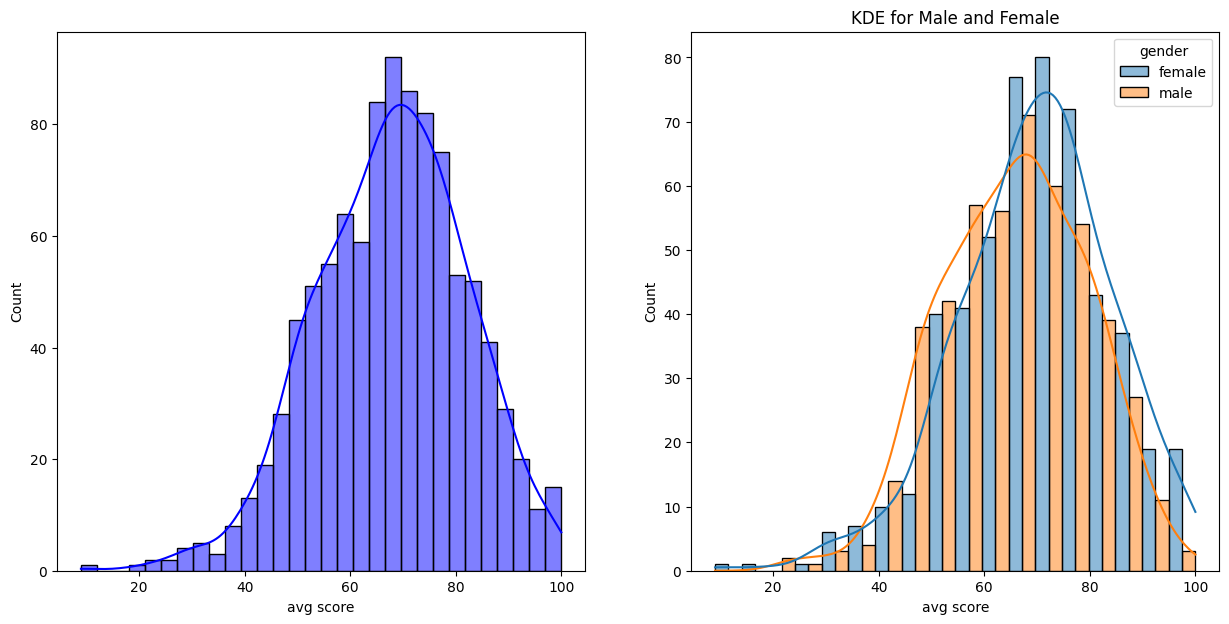

In [16]:
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='avg score',bins=30,kde=True,color='b')
plt.subplot(122)
plt.title('KDE for Male and Female')
sns.histplot(data=df, x='avg score',bins=30,kde=True,hue='gender',binwidth=5,multiple='dodge')
plt.show()

# Females tend to perfrom well than male students

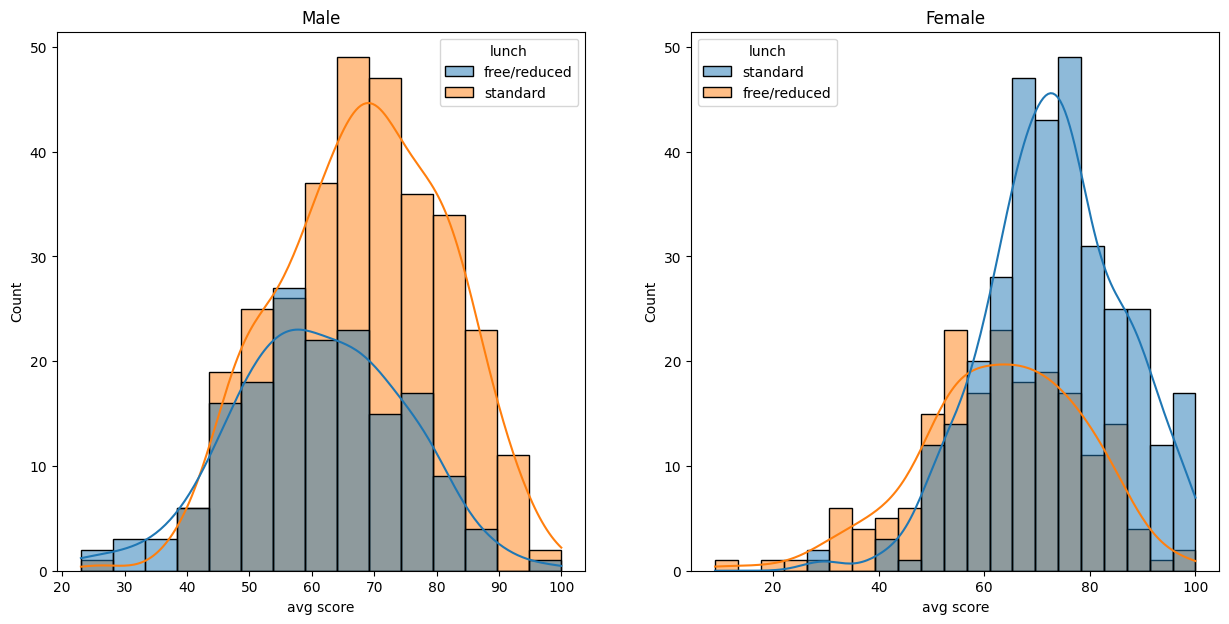

In [17]:
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='lunch')
plt.subplot(122)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='lunch')
plt.show()

# Standard lunch helps to perform
# well be it male or female  

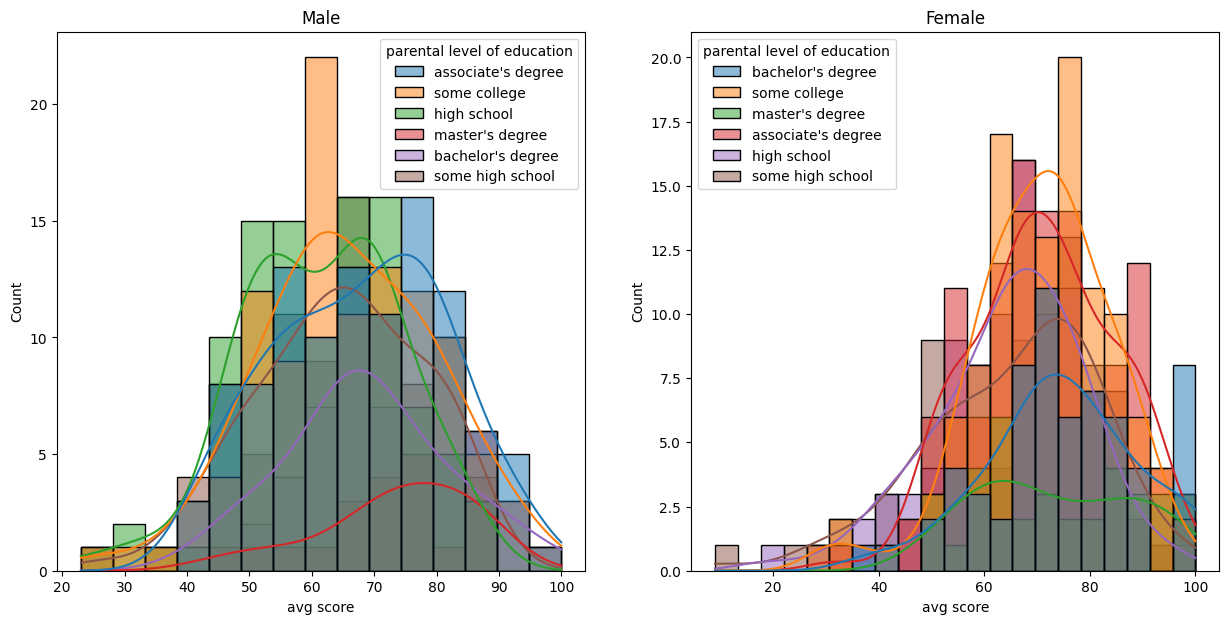

In [18]:
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='parental level of education',multiple='layer')
plt.subplot(122)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='parental level of education',multiple='layer')
plt.show()


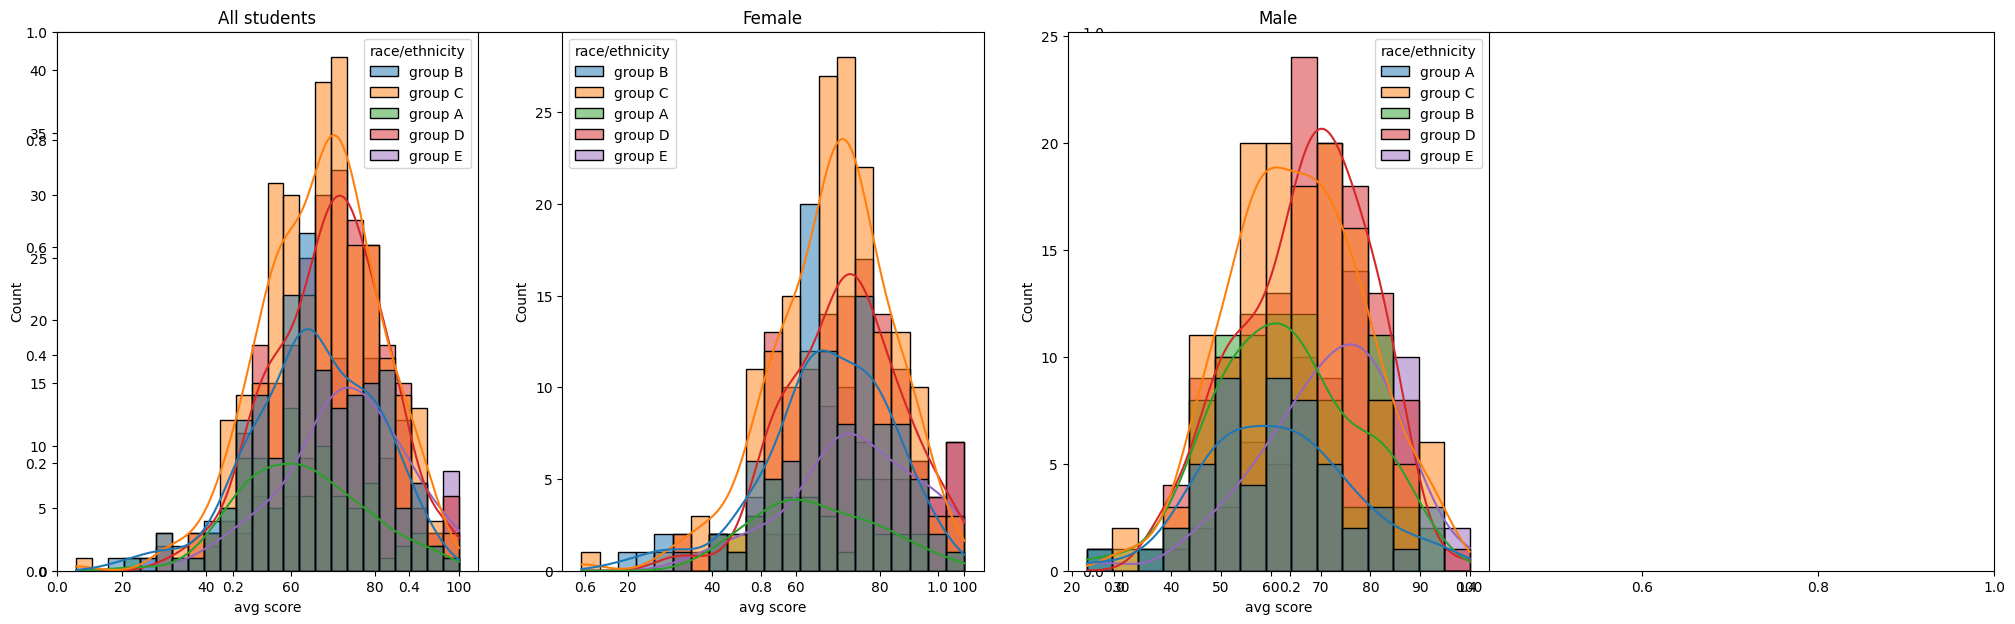

In [19]:
plt.subplots(1,2 ,figsize=(25,7))
plt.subplot(141)
plt.title('All students')
ax =sns.histplot(data=df,x='avg score',kde=True,hue='race/ethnicity')
plt.subplot(142)
plt.title('Female')
ax =sns.histplot(data=df[df.gender=='female'],x='avg score',kde=True,hue='race/ethnicity')
plt.subplot(143)
plt.title('Male')
ax =sns.histplot(data=df[df.gender=='male'],x='avg score',kde=True,hue='race/ethnicity')
plt.show()

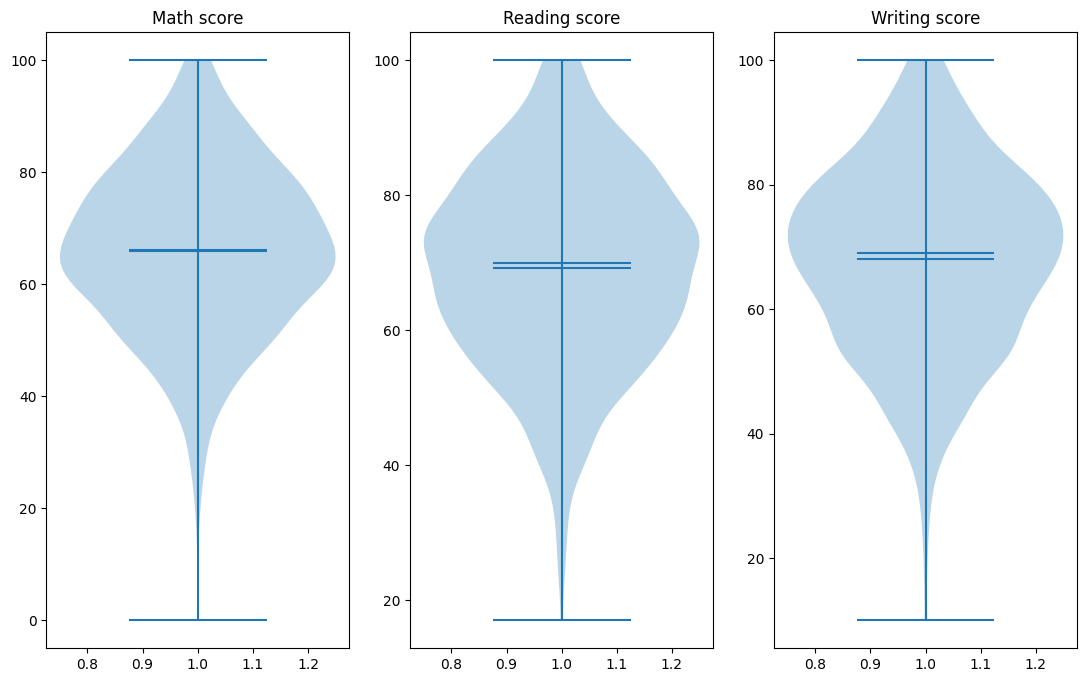

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math score')
plt.violinplot(dataset=df['math score'],orientation='vertical',showmeans=True,showmedians=True)
plt.subplot(1,4,2)
plt.title('Reading score')
plt.violinplot(dataset=df['reading score'],orientation='vertical',showmeans=True,showmedians=True)
plt.subplot(1,4,3)
plt.title('Writing score')
plt.violinplot(dataset=df['writing score'],orientation='vertical',showmeans=True,showmedians=True)
plt.show()


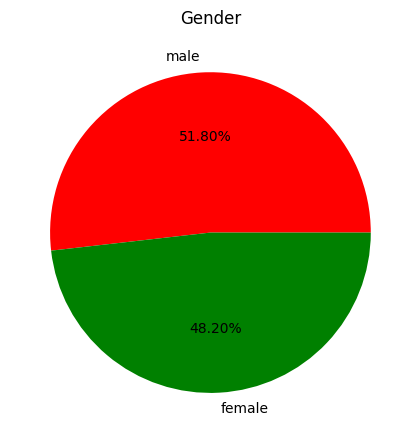

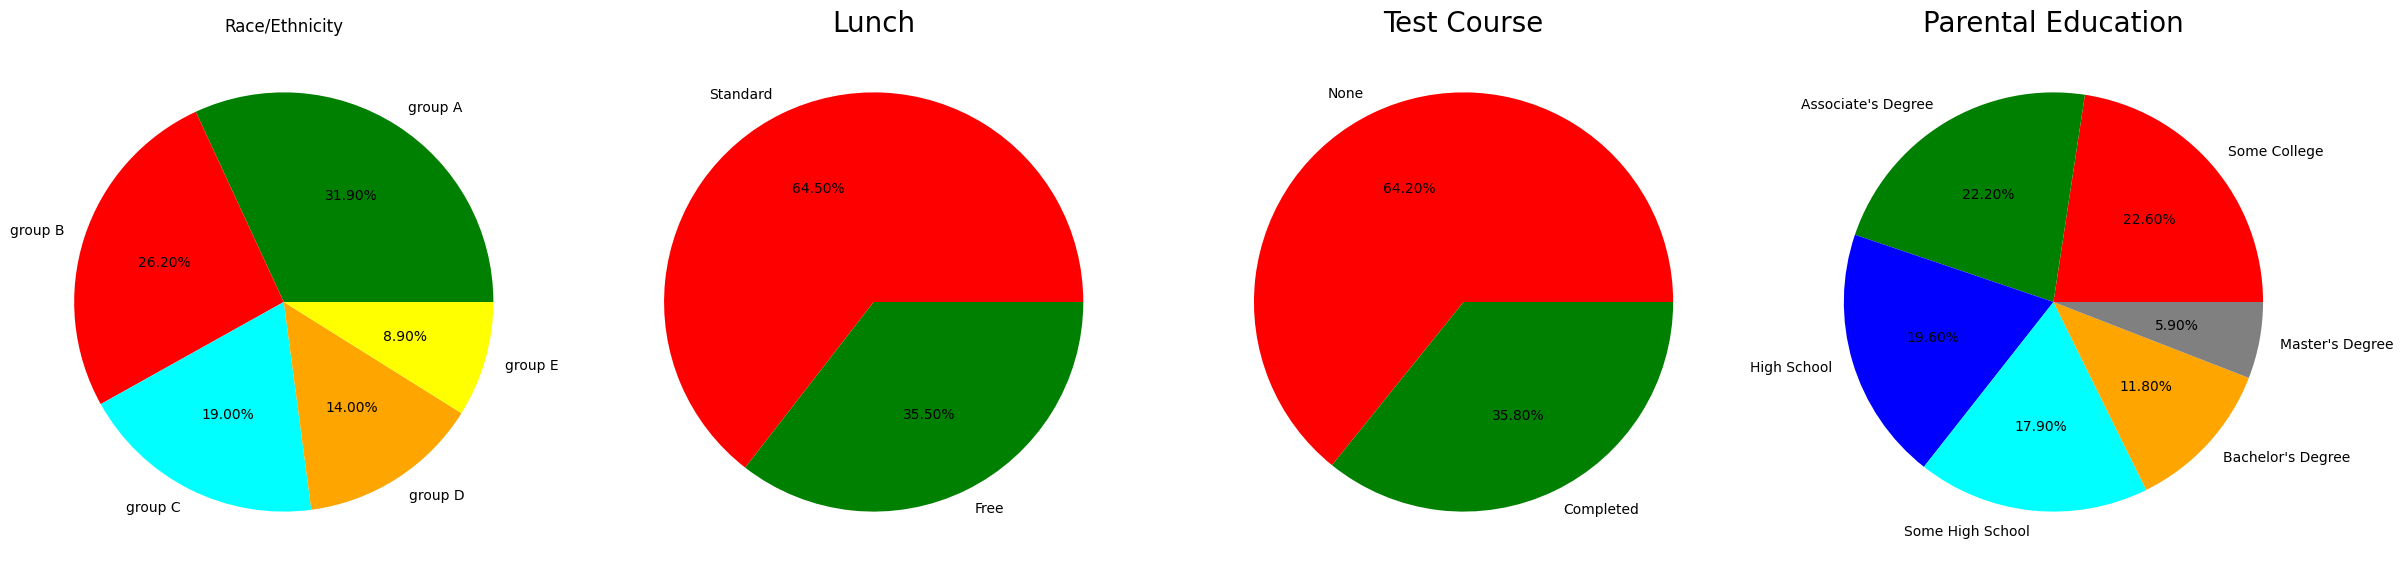

In [23]:
plt.figure(figsize=(30,12))
plt.subplot(1,5,1)

size= df['gender'].value_counts()
label= ['male','female']
color= ['red','green']

plt.pie(size,colors=color,labels=label,autopct='%1.2f%%')
plt.title('Gender')
plt.axis(False)

plt.figure(figsize=(30,12))
plt.subplot(1,5,2)

size=df['race/ethnicity'].value_counts()
label=['group A','group B','group C','group D','group E']
color=['green','red','cyan','orange','yellow']

plt.pie(size,colors=color,labels=label,autopct='%1.2f%%')
plt.title('Race/Ethnicity')
plt.axis(False)


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()
